<div class="alert alert-block alert-success">
<b>Comentario general del revisor</b> <a class="tocSkip"></a><br />
Status del proyecto: <b>Aprobado</b>
</div>


¡Hola!<br />
Soy **Francisco Cortés**, estoy contento de revisar tu proyecto y ser parte de tu proceso de aprendizaje.
A lo largo del texto, haré algunas observaciones sobre mejoras en el código y también haré comentarios sobre tus percepciones sobre el tema. Si existe algún error en el código, no te preocupes, estoy aquí para ayudarte a mejorarlo, en la primera iteración te lo señalaré para que tengas la oportunidad de corregirlo, pero si aún no encuentras una solución para esta tarea, te daré una pista más precisa en la próxima iteración y también algunos ejemplos prácticos. Estaré abierto a retroalimentación y discusiones sobre el tema.<br />
Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o borres**.
Revisaré cuidadosamente tu código para comprobar que se han cumplido con los requisitos y te proporcionaré mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si la ejecución fue perfecta succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existe alguna recomendación para que tu código mejore.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existen correcciones necesarias para cumplir con los requisitos. El trabajo no puede ser aceptado si hay alguna caja roja.
</div>

Puedes responderme de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

### IMPORTAMOS LIBRERÍAS 

In [1]:
#Importamos las librerías necesarias para análisis de datos, visualización y pruebas estadísticas.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### IMPORTAMOS DATASETS

In [2]:
#Cargamos los datasets obtenidos a partir de consultas SQL para analizarlos en Python.
df_companies = pd.read_csv('/datasets/project_sql_result_01.csv')
df_neighborhoods = pd.read_csv('/datasets/project_sql_result_04.csv')

### ESTUDIAMOS LOS DATOS Y VERIFICAMOS TIPOS DE DATOS

In [3]:
#Exploramos estructura, tipos de datos y valores generales para detectar posibles problemas en df_companies
df_companies.head()
df_companies.info()
df_companies.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [4]:
#Exploramos estructura, tipos de datos y valores generales para detectar posibles problemas en df_neighborhoods
df_neighborhoods.head()
df_neighborhoods.info()
df_neighborhoods.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


In [5]:
#Verificamos que los tipos sean correctos en df_companies
df_companies.dtypes

company_name    object
trips_amount     int64
dtype: object

In [6]:
#Modificamos el tipo de datos de trips_amount a flotante para continuar con un análisis exploratorio eficaz
df_companies['trips_amount'] = df_companies['trips_amount'].astype(float)
df_companies.dtypes

company_name     object
trips_amount    float64
dtype: object

In [7]:
#Verificamos que los tipos sean correctos en df_neighborhoods
df_neighborhoods.dtypes

dropoff_location_name     object
average_trips            float64
dtype: object

### ANÁLISIS DE IDENTIFICACIÓN DE DATOS PUNTUALES DEL PROYECTO

In [8]:
#Identificamos los 10 barrios con mayor número promedio de finalizaciones.
top10 = df_neighborhoods.sort_values(
    by='average_trips',
    ascending=False
).head(10)

print(top10)

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


### GRÁFICOS DE INFORMACIÓN

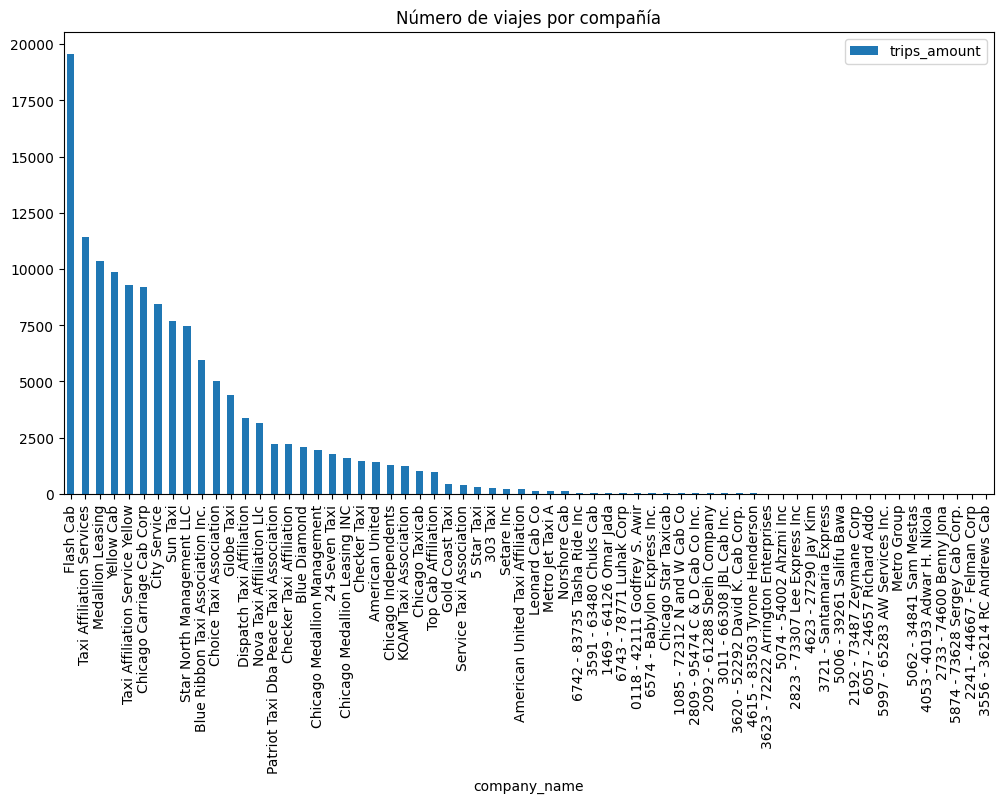

In [9]:
#Visualizamos la distribución de viajes por empresa.
df_companies.sort_values(
    by='trips_amount',
    ascending=False
).plot(
    x='company_name',
    y='trips_amount',
    kind='bar',
    figsize=(12,6)
)

plt.title('Número de viajes por compañía')
plt.xticks(rotation=90)
plt.show()

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

Correcto!<br/>

Buena manera de mostrar el resultado, se puede observar la compañía que tiene más viajes agendados

Una manera alternativa de mostrar esta gráfica sería limitando el número de compañías, es decir, puedes elegir por ejemplo las primeras 15, esto no va a afectar ya que como se puede ver las últimas compañías no aportan mucho a la visualización
</div>

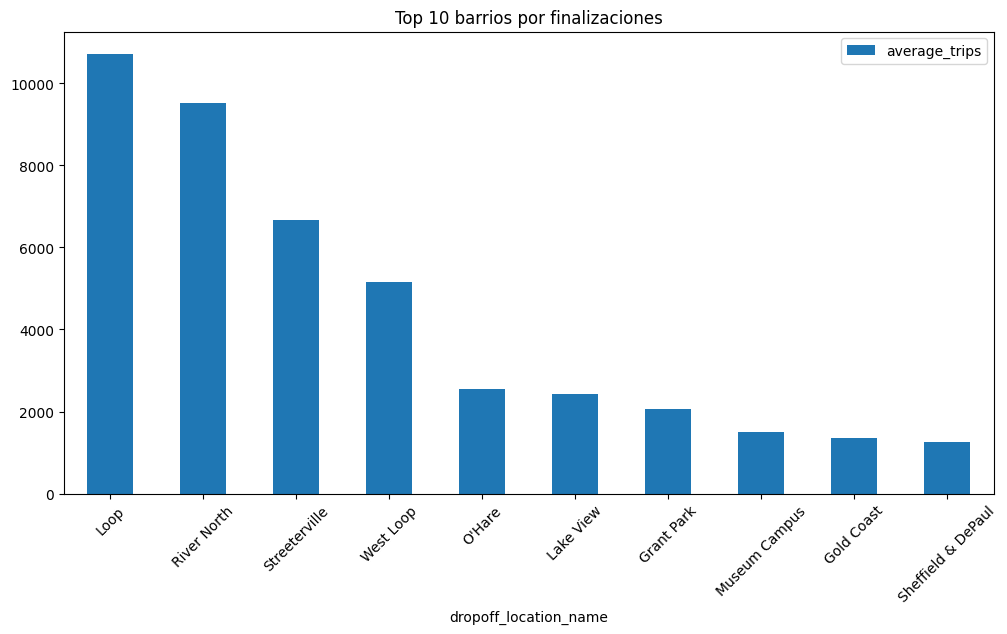

In [10]:
top10.plot(
    x='dropoff_location_name',
    y='average_trips',
    kind='bar',
    figsize=(12,6)
)

plt.title('Top 10 barrios por finalizaciones')
plt.xticks(rotation=45)
plt.show()

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

Correcto!<br/>

Buena manera de crear una grafica que nos muestra los lugares más frecuentados
</div>

CONCLUSIONES BASADAS EN GRÁFICOS:

Se observa que unas pocas compañías concentran la mayor parte de los viajes, lo que indica una alta competencia desigual en el mercado.
Los barrios principales concentran la mayoría de las finalizaciones, lo que sugiere zonas de alta demanda.

### PRUEBA DE HIPÓTESIS CON VISUALIZACIONES

In [11]:
df_trips = pd.read_csv('/datasets/project_sql_result_07.csv')

In [12]:
rainy = df_trips[df_trips['weather_conditions'] == 'Bad']['duration_seconds']
print(rainy)

6       2969.0
30      1980.0
34      2460.0
51      2760.0
52      2460.0
         ...  
1031    2560.0
1032    1908.0
1053    2400.0
1061    2186.0
1067    2834.0
Name: duration_seconds, Length: 180, dtype: float64


In [13]:
good = df_trips[df_trips['weather_conditions'] == 'Good']['duration_seconds']
print(good)

0       2410.0
1       1920.0
2       1543.0
3       2512.0
4       1440.0
         ...  
1062    1500.0
1063       0.0
1064    1318.0
1065    2100.0
1066    1380.0
Name: duration_seconds, Length: 888, dtype: float64


<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

Bien hecho!<b/>

La manera de separar la información de ambos días es correcta
</div>

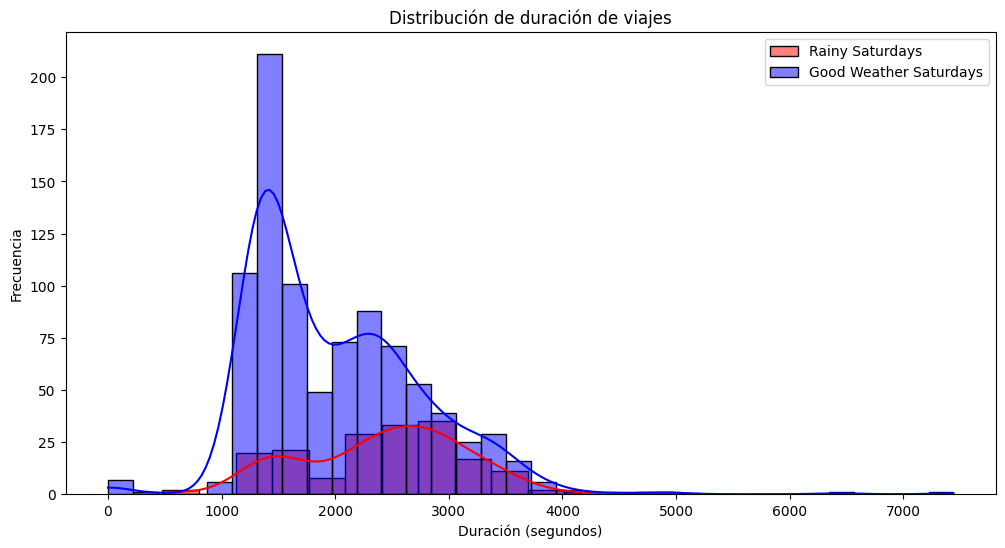

In [14]:
#Observamos la distribución de la duración de los viajes en condiciones lluviosas vs clima favorable.
plt.figure(figsize=(12,6))

sns.histplot(rainy, color='red', label='Rainy Saturdays', kde=True)
sns.histplot(good, color='blue', label='Good Weather Saturdays', kde=True)

plt.legend()
plt.title('Distribución de duración de viajes')
plt.xlabel('Duración (segundos)')
plt.ylabel('Frecuencia')
plt.show()

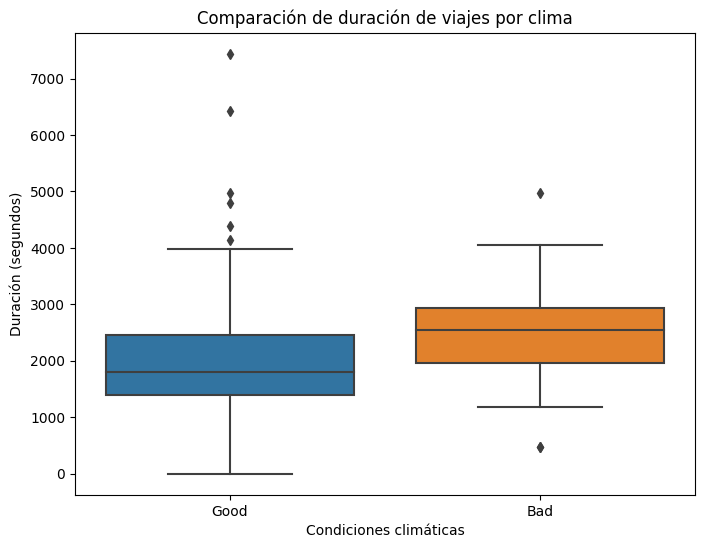

In [15]:
#El boxplot permite comparar medianas, dispersión y presencia de valores extremos entre grupos.
plt.figure(figsize=(8,6))

sns.boxplot(
    x='weather_conditions',
    y='duration_seconds',
    data=df_trips
)

plt.title('Comparación de duración de viajes por clima')
plt.xlabel('Condiciones climáticas')
plt.ylabel('Duración (segundos)')
plt.show()

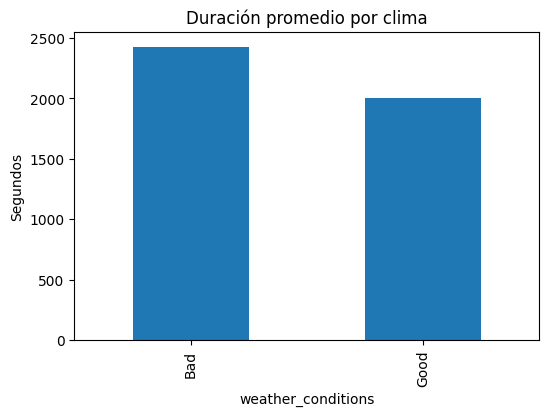

In [16]:
#Comparamos visualmente las medias antes del test estadístico.
means = df_trips.groupby('weather_conditions')['duration_seconds'].mean()

means.plot(kind='bar', figsize=(6,4))

plt.title('Duración promedio por clima')
plt.ylabel('Segundos')
plt.show()

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

Gracias a las graficas podemos ver que hay una clara diferencia entre ambos tipos de día
</div>

In [17]:
#Usamos alfa = 0.05, estándar en análisis estadístico.
alpha = 0.05

results = stats.ttest_ind(rainy, good, equal_var=False)

print("p-value:", results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value: 6.738994326108734e-12
Rechazamos la hipótesis nula


<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

Bien hecho!<br/>

Es correcto rechazar la hipotesis nula, debido a que sí hay notables cambios entre un día de buenas condiciones y uno con malas condiciones
</div>

Las visualizaciones muestran diferencias en la distribución y en la duración promedio.
El test t confirma estadísticamente si esa diferencia es significativa.

¿Cómo planteé las hipótesis nula y alternativa?

Para evaluar si el clima afecta la duración de los viajes, dividí los datos en dos grupos: viajes realizados en sábados lluviosos y viajes en sábados con clima favorable. A partir de esto formulé las siguientes hipótesis:

Hipótesis nula (H0):
La duración promedio de los viajes es la misma en sábados lluviosos y en sábados sin lluvia.

Hipótesis alternativa (H1):
La duración promedio de los viajes cambia en sábados lluviosos.

La hipótesis nula representa la idea de que el clima no tiene impacto en la duración de los viajes. La hipótesis alternativa plantea que sí existe una diferencia entre los grupos.

¿Qué criterio usé para probar las hipótesis y por qué?

Para comparar los dos grupos utilicé una prueba t de Welch para muestras independientes, ya que permite comparar promedios entre dos grupos que no necesariamente tienen la misma varianza. Este método es adecuado para datos reales donde no se puede asumir que ambos grupos se comportan igual.

Definí un nivel de significación de α = 0.05, que es un valor estándar en análisis estadístico. Si el valor p obtenido en la prueba es menor que 0.05, se rechaza la hipótesis nula. En caso contrario, no hay suficiente evidencia para rechazarla.

Este criterio me permitió tomar una decisión basada en evidencia estadística y no solo en diferencias visuales observadas en los gráficos.

### CONCLUSIÓN FINAL DEL PROYECTO


Durante este proyecto analicé datos de viajes en taxi en Chicago con el objetivo de identificar patrones en la demanda y entender cómo factores externos, como el clima, pueden influir en la duración de los viajes.

Primero realicé un análisis exploratorio de datos para conocer la distribución de los viajes por compañía y los barrios con mayor número de finalizaciones. Observé que unas pocas empresas concentran una gran parte de los viajes, lo que sugiere que el mercado está dominado por compañías principales. También identifiqué que ciertos barrios tienen una demanda significativamente mayor, lo que puede indicar zonas clave de movilidad dentro de la ciudad.

Después, evalué la hipótesis sobre si la duración promedio de los viajes desde el Loop hasta el aeropuerto O'Hare cambia en sábados lluviosos. Utilicé una prueba estadística t para comparar los grupos de viajes con clima lluvioso y clima favorable. Las visualizaciones ayudaron a entender la distribución de los datos y reforzaron el análisis numérico.

Con base en los resultados del test estadístico, concluí que existe evidencia suficiente para afirmar que el clima tiene un impacto en la duración de los viajes. Esto demuestra que factores externos como el clima deben considerarse al analizar el comportamiento del transporte urbano.

Este proyecto me permitió practicar el uso de SQL para extracción de datos, Python para análisis exploratorio, visualización de información y pruebas de hipótesis. También reforzó la importancia de combinar análisis estadístico con interpretación práctica para obtener conclusiones útiles.

# Comentario general del revisor
<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Has realizado un buen trabajo, me doy cuenta de que has aplicado los conocimientos que has adquirido durante el curso, los procedimientos realizados son correctos, este es un ejercicio que nos ayuda a entender y comprobar las hipotesis con procesos estadisticos.<br/>    
<br/>    
Te felicito por el gran trabajo que has hecho, continúa así y mucho éxito en el siguiente Sprint!
</div>


<div class="alert alert-block alert-success">
<b>Aspectos positivos del proyecto</b> <a class="tocSkip"></a><br />

- Las observaciones intermedias, así como las conclusiones finales me parecen bastante detalladas
- Las graficas utilizadas me parecen del tipo correcto
- El proyecto esta ordenado
- El proyecto es directo y conciso
- Se revisaron detalles muy minuciosamente con bastante cuidado
    
</div> 